In [20]:
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
%matplotlib inline

In [48]:
img = plt.imread('/Users/alzaia/Desktop/cnn_project/data_2_classes_gen/validation_different/img.png')
groundtruth = plt.imread('/Users/alzaia/Desktop/cnn_project/data_2_classes_gen/validation_different/groundtruth.png')
prediction = plt.imread('/Users/alzaia/Desktop/cnn_project/data_2_classes_gen/validation_different/prediction.png')

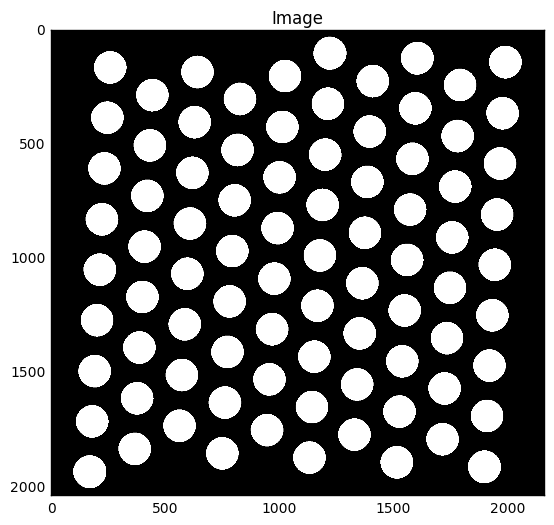

In [49]:
plt.figure(figsize=(10,6))
plt.title('Image')
plt.imshow(img, cmap='gray')

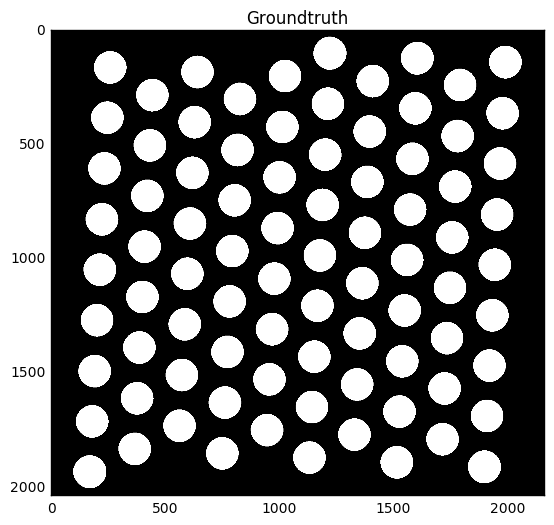

In [50]:
plt.figure(figsize=(10,6))
plt.title('Groundtruth')
plt.imshow(groundtruth, cmap='gray')

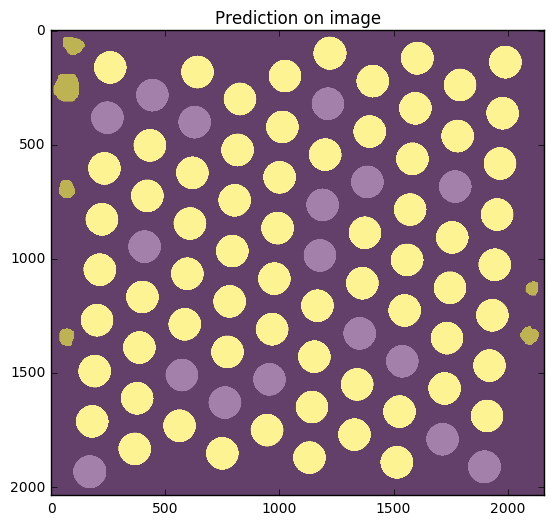

In [51]:
plt.figure(figsize=(10,6))
plt.title('Prediction on image')
plt.imshow(img, cmap='gray', alpha=0.5)
plt.imshow(prediction, cmap='viridis', alpha=0.5)

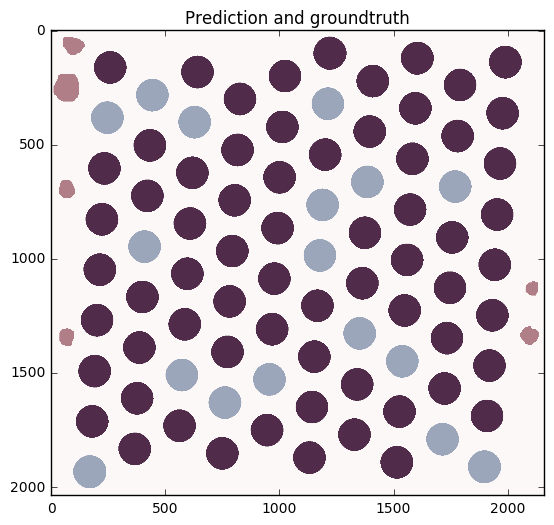

In [52]:
plt.figure(figsize=(10,6))
plt.title('Prediction and groundtruth')
plt.imshow(groundtruth, cmap='Blues', alpha=0.8)
plt.imshow(prediction, cmap='Reds', alpha=0.5)

In [63]:

def ROC_metrics(groundtruth, prediction):
    """
    Calculates segmentation score by keeping an only true centroids as TP.
    Returns sensitivity (TP/TP+FP), precision (FP/TP+FN)

    :param groundtruth: groundtruth binary mask of the image
    :param prediction: segmentation binary mask
    :return: [sensitivity, precision]
    """
    # minimal area that should be considered in analysis
    min_area=2
    
    # get binary objects in prediction and groundtruth masks
    labels_pred = measure.label(prediction)
    regions_pred = regionprops(labels_pred)
    
    labels_true = measure.label(groundtruth)
    regions_true = regionprops(labels_true)

    # get centroids of objects in prediction mask
    centroids_pred = np.array([list(x.centroid) for x in regions_pred])
    centroids_pred = centroids_pred.astype(int)
    print(centroids_pred)
    
    # remove objects whose area is smaller than input area threshold
    areas = np.array([x.area for x in regions_pred])
    centroids_pred = centroids_pred[areas > min_area]

    centroid_candidates = set([tuple(row) for row in centroids_pred])
    print(centroid_candidates)

    centroids_T = []
    notDetected = []

    for axon in regions_true:
        axon_coords = [tuple(row) for row in axon.coords]
        axon_center = (np.array(axon.centroid)).astype(int)
        centroid_match = set(axon_coords) & centroid_candidates # false negatives are empty
        
        centroid_candidates = centroid_candidates.difference(centroid_match)
        
        centroid_match = list(centroid_match)
        if len(centroid_match) != 0:
            diff = np.sum((centroid_match - axon_center) ** 2, axis=1)
            ind = np.argmin(diff)
            center = centroid_match[ind]
            centroids_T.append(center)
        if len(centroid_match) == 0:
            notDetected.append(axon_center)

    centroids_F = list(centroid_candidates)
    P = len(regions_true) # all axons in groundtruth
    TP = len(centroids_T) # axons in both groundtruth and prediction

    FP = len(centroids_F) # axons in 

    centroids_F = np.array(centroids_F)
    centroids_T = np.array(centroids_T)

    sensitivity = round(float(TP) / P, 3)
    # errors = round(float(FP) / P, 3)
    precision = round(float(TP) / (TP + FP), 3)

    return [sensitivity, precision]

In [64]:
[sensitivity, precision]=ROC_metrics(groundtruth, prediction)
print(sensitivity)
print(precision)

[[ 105 1219]
 [  71   96]
 [ 127 1602]
 [ 144 1987]
 [ 167  258]
 [ 187  640]
 [ 205 1023]
 [ 227 1407]
 [ 244 1788]
 [ 255   68]
 [ 305  826]
 [ 346 1593]
 [ 367 1975]
 [ 427 1011]
 [ 447 1393]
 [ 467 1778]
 [ 508  432]
 [ 528  815]
 [ 548 1198]
 [ 566 1580]
 [ 587 1963]
 [ 608  233]
 [ 628  618]
 [ 647  999]
 [ 728  421]
 [ 700   68]
 [ 748  803]
 [ 788 1570]
 [ 810 1951]
 [ 831  222]
 [ 849  607]
 [ 869  990]
 [ 890 1372]
 [ 910 1754]
 [ 970  792]
 [1008 1557]
 [1030 1940]
 [1051  213]
 [1069  596]
 [1090  976]
 [1110 1361]
 [1130 1745]
 [1170  399]
 [1133 2104]
 [1190  780]
 [1209 1165]
 [1229 1546]
 [1250 1930]
 [1272  201]
 [1290  584]
 [1311  966]
 [1350 1731]
 [1339 2092]
 [1345   68]
 [1391  386]
 [1410  771]
 [1431 1151]
 [1470 1917]
 [1494  190]
 [1553 1338]
 [1570 1721]
 [1613  376]
 [1652 1141]
 [1672 1523]
 [1690 1907]
 [1714  179]
 [1733  561]
 [1752  944]
 [1772 1326]
 [1834  365]
 [1854  748]
 [1873 1130]
 [1893 1512]]
set([(187, 640), (1272, 201), (127, 1602), (1133, 

In [ ]:
def ROC_metrics(groundtruth, prediction):
    """
    Calculates segmentation score by keeping an only true centroids as TP.
    Returns sensitivity (TP/TP+FP), precision (FP/TP+FN)

    :param img: image to segment
    :param groundtruth: groundtruth of the image
    :param prediction: segmentation
    :param visualization: if True, FP and TP are displayed on the image
    :param min_area: minimal area of the predicted axon to count.
    :return: [sensitivity, precision]
    """
    
    min_area=2
    
    # get binary objects in prediction and groundtruth masks
    labels_pred = measure.label(prediction)
    regions_pred = regionprops(labels_pred)
    
    labels_true = measure.label(groundtruth)
    regions_true = regionprops(labels_true)

    # get centroids of objects in prediction mask
    centroids_pred = np.array([list(x.centroid) for x in regions_pred])
    centroids_pred = centroids_pred.astype(int)
    #print(centroids_pred)
    
    # remove objects whose area is smaller than input area threshold
    areas = np.array([x.area for x in regions_pred])
    centroids_pred = centroids_pred[areas > min_area]



    centroid_candidates = set([tuple(row) for row in centroids_pred])

    centroids_T = []
    notDetected = []

    for axon in regions_true:
        axon_coords = [tuple(row) for row in axon.coords]
        axon_center = (np.array(axon.centroid)).astype(int)
        centroid_match = set(axon_coords) & centroid_candidates
        centroid_candidates = centroid_candidates.difference(centroid_match)
        centroid_match = list(centroid_match)
        if len(centroid_match) != 0:
            diff = np.sum((centroid_match - axon_center) ** 2, axis=1)
            ind = np.argmin(diff)
            center = centroid_match[ind]
            centroids_T.append(center)
        if len(centroid_match) == 0:
            notDetected.append(axon_center)

    centroids_F = list(centroid_candidates)
    P = len(regions_true)
    TP = len(centroids_T)

    FP = len(centroids_F)

    centroids_F = np.array(centroids_F)
    centroids_T = np.array(centroids_T)
    # not_detected = len(np.array(notDetected))

    sensitivity = round(float(TP) / P, 3)
    # errors = round(float(FP) / P, 3)
    precision = round(float(TP) / (TP + FP), 3)

    return [sensitivity, precision]

In [41]:

def dice(groundtruth, prediction):
    """
    :param groundtruth : True segmentation
    :param prediction : Segmentation predicted by the algorithm
    :return dice_scores: pandas dataframe associating the axon predicted, its size and its dice score
    To get the global dice score of the prediction,
    """
    min_area=3
    h, w = groundtruth.shape

    labels_true = measure.label(groundtruth)
    regions_true = regionprops(labels_true)

    labels_pred = measure.label(prediction)
    regions_pred = regionprops(labels_pred)
    features = ['coords', 'area', 'dice']
    df = pd.DataFrame(columns=features)

    i = 0
    for axon_predicted in regions_pred:
        centroid = (np.array(axon_predicted.centroid)).astype(int)
        if groundtruth[(centroid[0], centroid[1])] == 1:
            for axon_true in regions_true:

                if [centroid[0], centroid[1]] in axon_true.coords.tolist():
                    surface_pred = np.zeros((h, w))
                    surface_true = np.zeros((h, w))

                    surface_pred[axon_predicted.coords[:, 0], axon_predicted.coords[:, 1]] = 1
                    surface_true[axon_true.coords[:, 0], axon_true.coords[:, 1]] = 1
                    intersect = surface_pred * surface_true

                    Dice = 2 * float(sum(sum(intersect))) / (sum(sum(surface_pred)) + sum(sum(surface_true)))
                    df.loc[i] = [axon_predicted.coords, axon_predicted.area, Dice]
                    break
        i += 1
    dice_scores = df[df['area'] > min_area]
    return dice_scores

In [66]:
print(groundtruth.shape)

(2037, 2161)


In [40]:
dice_scores=dice(img, groundtruth, prediction, min_area=3)
print(dice_scores)

ValueError: too many values to unpack